# 08 Pre-Class Assignment: Robotics and Reference Frames

<img alt="Image of a 6-axis FANUC robot used in industry" src="http://www.fanuc.com/product/image/m2000ia.jpg" width="25%">

Image from: [www.fanuc.com](http://www.fanuc.com/)




### Goals for today's pre-class assignment 

1. [Review](#Review)
1. [2D Forward Kinematics](#2D_Forward_Kinematics)

Reference: https://studywolf.wordpress.com/2013/08/21/robot-control-forward-transformation-matrices/


----

<a name="Review"></a>
## 1. Review

&#9989; **<font color=red>QUESTION:</font>**  Matrix $A$ is of size ($m_1 \times n_1$) and matrix $B$ is of size ($m_2 \times n_2$).  What must be true about the dimensions in order to multiply $A B$?  

n1 and m2 must be the same size in order to multiply them. the new dimensions will be m1 and n2

&#9989; **<font color=red>QUESTION:</font>** The following transformation matrix will move points (by rotation and translation) in $\mathbb R^n$ dimensional space. What is $n$? 

$$
\left[
\begin{matrix}
    \sin{(\theta)} & -\cos{(\theta)} & 0 & d_x \\ 
    \cos{(\theta)} & \sin{(\theta)}  & 0 & d_y \\ 
    0 & 0  & 1 & d_z \\ 
    0 & 0  & 0 & 1 
\end{matrix}
\right] 
$$

the space where the points are n-tuplets of real numbers. So here the vector's size is 4 so n=4

&#9989; **<font color=red>QUESTION:</font>**  The above matrix rotates around which axis?

the matrix above rotates around the xy plane counterclockwise using θ with respect to the x axis.
 
Since we rotate about the x axis, the y values become opposites while keeping the same x values


&#9989; **<font color=red>QUESTION:</font>** In the above matrix, how do the scalar values $d_x, d_y, d_z$ influence the transformation? 

these values influence the transformation with translation in the direction that the values are in.

**Definition:** A linear system, which can be written in the form $Ax=0$ or equivalently
$$
\begin{array}{rrr}
a_{11}x_1 + a_{12}x_2 +\dots a_{1n}x_n &=& 0\\
\dots \\
a_{m1}x_1 + a_{m2}x_2 +\dots a_{mn}x_n &=& 0
\end{array}
$$
is called a **homogeneous** linear system. Note that a homogeneous linear system always has the zero vector $x=(x_1, \dots, x_n)=(0, \dots, 0)$ as a solution.

&#9989; **<font color=red>QUESTION:</font>**  Determine which of the following linear sysetms are homogeneous. It may be a good idea to *put them in standard form first* (i.e. all variables on one side of the equations). Explain your reasoning.

**System 1:**
$
\begin{array}{rrr}
3x+5y &=& z\\
x-z &=& y
\end{array}
$

**System 2:**
$
\begin{array}{rrr}
3x-2y+3z+5 &=& 0\\
x+y-z &=& 0
\end{array}
$


After putting each equation into standard form it is easily notable that system 2 is not homogenous. According to the definition above there cannot be a variable 5x0 such as the first equation of system 2. This would result in the requirements of teh definition not being met since teh solutiosn would be different with this value. 

----

<a name="2D_Forward_Kinematics"></a>
## 2. 2D Forward Kinematics
<img src="https://lh5.googleusercontent.com/S70gMT_jN3x0hSoCAapLydJNeYZYmcetjf09XiF0YsO2QbBZHiIq9VpY4Mc6ocuBphgJeUxDC5JZ10UkpQDhe2XW6NJQPDzVp3ool_fiHXHU-MRMChMcY93vZXoE=w263" width="25%">

This robot can move in the $x-y$ plane.  We can represent the configuration of the robot in its "*Joint Space*" by knowing the two joint angles or $[a_1,a_2]$.  However what we would like is to represent the location of the end of the robot (often called the "end effector" or "hand") in "world" coordinates (i.e. $x-y$ coordinate system). 

Today, we will use Linear Algebra and simple transformation matrices to try and calculate how to go from "joint" coordinates to "world" coordinates.  

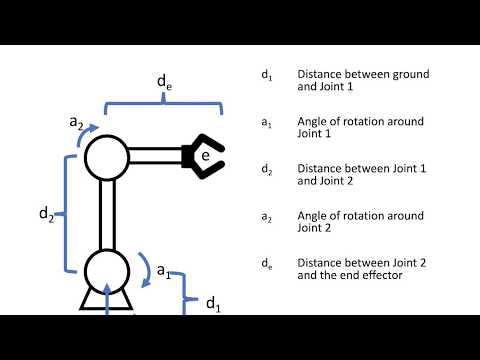

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("aCohcLYrYcY",width=640,height=360, cc_load_policy=True)

### Single axis Robot

The following code draws a simple single axis (single joint) robot with its joint centered at the origin and its initial angle of zero with an robot arm length of 4 "units" long.

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from ipywidgets import interact
import sympy as sym
sym.init_printing(True)

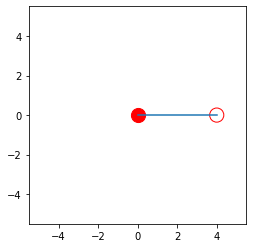

In [2]:
plt.scatter(4,0, s=200, facecolors='none', edgecolors='r') #plot end effector
plt.scatter(0,0, s=200, facecolors='r', edgecolors='r') # plot origin
plt.plot([0,4],[0,0]) #plot blue line for arm
plt.axis('square')
plt.xlim([-5.5,5.5])
plt.ylim([-5.5,5.5])
    

A 2D rotation matrix around the origin is defined as the following:

$$ 
\left[ \begin{matrix}
    x_{end} \\
    y_{end} 
 \end{matrix}
\right] 
=
\left[ \begin{matrix}
    \cos(a) & -\sin(a) \\
    \sin(a) & \cos(a) 
 \end{matrix}
\right] 
\left[ \begin{matrix}
    x_{start} \\
    y_{start} 
 \end{matrix}
\right] 
$$ 

The following rotation matrix will rotate the point $45^\circ$ around the origin:

⎡0.707106781186548  -0.707106781186547⎤
⎢                                     ⎥
⎣0.707106781186547  0.707106781186548 ⎦

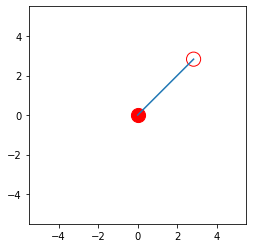

In [3]:
p = [[4],[0]]

a1=np.pi/4

R = np.matrix([[np.cos(a1), -np.sin(a1)], [np.sin(a1), np.cos(a1)]])

p2 = R*p

x1 = p2[0,0]
y1 = p2[1,0]

plt.scatter(x1,y1, s=200, facecolors='none', edgecolors='r') #plot end effector
plt.scatter(0,0, s=200, facecolors='r', edgecolors='r') # plot origin
plt.plot([0,x1],[0,y1]) #plot blue line for arm
plt.axis('square')
plt.xlim([-5.5,5.5])
plt.ylim([-5.5,5.5])
sym.Matrix(R)

The following code uses the Jupyter ```interact``` function and ```numpy``` to make an interactive view of the above.  This lets us change the value of the rotation motor and see how it changes the robot. The input to the function is the axis angle and the output is the $x-y$ coordinates.

**Note:** it can take some time for the interaction to catch up.  Try moving the slider slowly...

In [4]:
def Robot_Simulator(q1=0):
    a1 = q1/180  * np.pi
    p0 = np.matrix([4,0]).T
    p = p0
    J1 = np.matrix([[np.cos(a1), -np.sin(a1)], [np.sin(a1), np.cos(a1)]]) 
    p = np.concatenate( ( J1*p, np.matrix([0,0]).T), axis=1 )
    
    plt.scatter(p[0,:].tolist()[0],p[1,:].tolist()[0], s=200, facecolors='none', edgecolors='r')
    plt.scatter(0,0, s=200, facecolors='r', edgecolors='r')
    plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0])
    plt.axis('square')
    plt.xlim([-5.5,5.5])
    plt.ylim([-5.5,5.5])
    ax = plt.gca()
    plt.show()
    return([ p[0,0], p[1,0] ])
    
p = interact(Robot_Simulator, q1=(-180,180,2));

interactive(children=(IntSlider(value=0, description='q1', max=180, min=-180, step=2), Output()), _dom_classes…

&#9989; **<font color=red>DO THIS:</font>**  Inspect the above code. 

&#9989; **<font color=red>QUESTION:</font>** Which line of the code defines the transformation matrix for the robot joint?  

8

&#9989; **<font color=red>QUESTION:</font>** Which line of code defines the length of the robot arm? 

(Note you can turn line numbers on and off in jupyterhub.  Use the menu at the top to figure out how.)

line 10

### Multi axis robot

Now, let's consider the robot from the video:

<img src="https://lh3.googleusercontent.com/zCoCDGfsr8z3vqaGEfRYLH_YcDOrb2GRXOjkSEH0ASjxVH2FrRiXpa8c7NaQw0FYjXyX1rQXbpRmxXk7pg5KEnAE8lWb2m3Sorp5Kj7OIduFiMnMuI3oV2Vy0Mn0=w720" width="75%">

Notice it has two joints $a_1$ and $a_2$ and offset lengths of $d_1$, $d_2$ and $d_e$. The joint space for this robot is just its angles $[a_1, a_2]$. However, what we want is to know the location of end effector point $p_e$ at the gripper in the "world" reference frame, which the bottom most axis "on the ground".  

At each joint, we can define a reference frame that rotates and then transforms the origin to the ealier joint. The forward transformation matrices capture the relationship between the reference frames of different links of the robot. 

For example, we can move from the base motor, or $p_1$, reference frame to the world, or $p_w$, reference frame using the following equations:

$$ 
p_w
=
\left[ \begin{matrix}
    \cos(a_1) & -\sin(a_1) \\
    \sin(a_1) & \cos(a_1) 
 \end{matrix}
\right] 
p_1
+ 
\left[ \begin{matrix}
    0 \\
    d_1 
 \end{matrix}
\right].
$$ 


The equation shown  above is a little tricky to work with because the$ \left[ \begin{matrix}
    0 \\
    d_1 
 \end{matrix}
\right] $ part makes the function on the right hand side **non-linear**. What we mean by this is that if we define $f(x) = Ax+b
$, where $A=\left[ \begin{matrix}
    \cos(a_1) & -\sin(a_1) \\
    \sin(a_1) & \cos(a_1) 
 \end{matrix}
\right] $ and $b=\left[ \begin{matrix}
    0 \\
    d_1 
 \end{matrix}
\right]$, then $f(x+y)\ne f(x)+f(y)$. Note that linearity requires $f(x+y)= f(x)+f(y)$ for all  $x$ and $y$.


However, there is an easy trick in Linear Algebra to convert the above to a linear system. 
This trick  requires us to keep an extra 1 (one) for each point but makes the math work out nicely. 
Basically the trick works as follows:

$$ 
\left[ \begin{matrix}
    x_w \\
    y_w \\
    1 
 \end{matrix}
\right] 
=
\left[ \begin{matrix}
    cos(a_1) & -sin(a_1) & 0 \\
    sin(a_1) & cos(a_1) & d_1 \\
    0 & 0 & 1
 \end{matrix}
\right] 
\left[ \begin{matrix}
    x_1 \\
    y_1 \\
    1 
 \end{matrix}
\right] 
$$ 

Let's call the transformation matrix for Joint 1, $J_1$, and we can rewrite the equations as follows:

$$p_1 = J_1p_2$$

##Answer


Note that here we need to be careful, since if we add two vectors, we do not add the third coordinate   this acts a bit like projective geometry:
$$
\left[ \begin{matrix}
    x_1 \\
    y_1 \\
    1 
 \end{matrix}
\right] +
\left[ \begin{matrix}
    x_2 \\
    y_2 \\
    1 
 \end{matrix}
\right] =
\left[ \begin{matrix}
    x_1 +x_2\\
    y_1 +y_2\\
    1 
 \end{matrix}
\right] 
$$
##Answer

&#9989; **<font color=red>DO THIS</font>** On your own, write out the above matrix multiplication and convince yourself that it is the same as the one above. 

Now, we can move from the $p_2$ reference frame to the $p_1$  reference frame using basically the same equation:

$$ 
\left[ \begin{matrix}
    x_1 \\
    y_1 \\
    1 
 \end{matrix}
\right] 
=
\left[ \begin{matrix}
    cos(a_2) & -sin(a_2) & d_2 \\
    sin(a_2) & cos(a_2) & 0 \\
    0 & 0 & 1
 \end{matrix}
\right] 
\left[ \begin{matrix}
    x_2 \\
    y_2 \\
    1 
 \end{matrix}
\right] 
$$ 


For the last step we can do a simple linear transpose from the end effector $p_e$ reference frame to the $p_2$ reference frame:

$$ 
\left[ \begin{matrix}
    x_2 \\
    y_2 \\
    1 
 \end{matrix}
\right] 
=
\left[ \begin{matrix}
    1 & 0 & d_2 \\
    0 & 1 & 0 \\
    0 & 0 & 1
 \end{matrix}
\right] 
\left[ \begin{matrix}
    x_e \\
    y_e \\
    1 
 \end{matrix}
\right] 
$$ 

If we call each transformation matrix $J_1, J_2, J_e$ then hopefully you can see that we can string these transformation matrices together such that we get a single transform from the end effector all the way back to the world coordinates as follows:

$$p_w = J_1J_2J_ep_e$$



Let's see what this looks like in Python.  I am going to use ```numpy```. The plotting gets a little awkward but hopefully it makes sense.

First, lets initialize the variables to some discreet numbers:


In [5]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from ipywidgets import interact

#Initial state
a1 = 0
a2 = 0

#Lenths of the offsets
d1 = 0.5
d2 = 3
de = 3

Next, I am going to define a set of points in the end effector coordinate system.  These points are picked to form a sort of "C" shaped designed to look sort of like an end effector.  I will plot them to help show you what I mean:

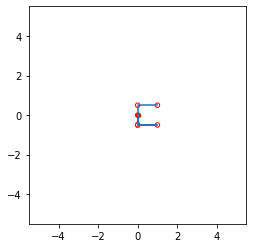

In [6]:
#Points needed to define a square
pe = np.matrix([[1, 0.5, 1],[0,0.5,1],[0,-0.5, 1],[1,-0.5, 1],[0,-0.5, 1],[0,0, 1]]).T ##.T returns the transpose of a matrix
p = pe

plt.scatter(p[0,:].tolist()[0],p[1,:].tolist()[0], s=20, facecolors='none', edgecolors='r')
plt.scatter(0,0, s=20, facecolors='r', edgecolors='r')
plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0])
plt.axis('scaled')
plt.xlim([-5.5,5.5])
plt.ylim([-5.5,5.5])

The next step is to apply the $J_e$ transformation matrix to the gripper points which will put them in the $p_2$ coordinate system.  Once the points are transposed the code concatenates the origin (0,0) onto the list of points so we can part of the robot arm in the plot:

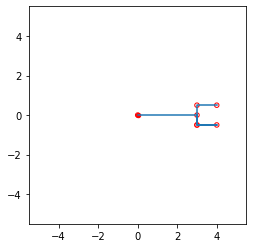

In [7]:
Je = np.matrix([[1, 0, de], 
                [0, 1, 0], 
                [0,0,1]]) 

p = np.concatenate( ( Je*p, np.matrix([0,0,1]).T), axis=1 )

plt.scatter(p[0,:].tolist()[0],p[1,:].tolist()[0], s=20, facecolors='none', edgecolors='r')
plt.scatter(0,0, s=20, facecolors='r', edgecolors='r')
plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0])
plt.axis('scaled')
plt.xlim([-5.5,5.5])
plt.ylim([-5.5,5.5])

We do this again.  Apply the $J_2$ transformation matrix to put the points into the $p_1$ coordinate system,  concatenate the origin and plot the results. 

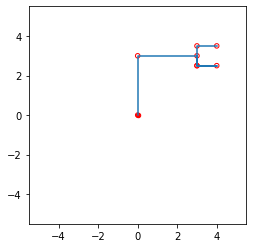

In [8]:
J2 = np.matrix([[np.cos(a2), -np.sin(a2), 0], 
                [np.sin(a2), np.cos(a2), d2], 
                [0,0,1]]) 

p = np.concatenate( ( J2*p, np.matrix([0,0,1]).T), axis=1 )

plt.scatter(p[0,:].tolist()[0],p[1,:].tolist()[0], s=20, facecolors='none', edgecolors='r')
plt.scatter(0,0, s=20, facecolors='r', edgecolors='r')
plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0])
plt.axis('scaled')
plt.xlim([-5.5,5.5])
plt.ylim([-5.5,5.5])

We do it yet again.   Apply the $J_1$ transformation matrix which will put the points in the $p_w$ coordinate system,  concatenate the origin and plot the results. The result is a skeletal frame representing our robot. 

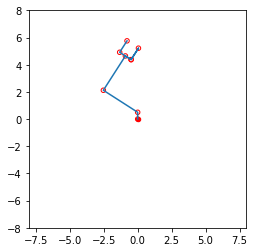

In [9]:
a1 = 1
a2 = 0
J1 = np.matrix([[np.cos(a1), -np.sin(a1), 0], 
                [np.sin(a1), np.cos(a1), d1], 
                [0,0,1]]) 

p = np.concatenate( ( J1*p, np.matrix([0,0,1]).T), axis=1 )

plt.scatter(p[0,:].tolist()[0],p[1,:].tolist()[0], s=20, facecolors='none', edgecolors='r')
plt.scatter(0,0, s=20, facecolors='r', edgecolors='r')
plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0])
plt.axis('scaled')
plt.xlim([-8,8])
plt.ylim([-8,8])

&#9989; **<font color=red>DO THIS:</font>** Modify the rotation variables ```a1``` and ```a2``` in the above code and see if the new robot configuration looks right. **_HINT_** make sure your angles are in radians.

The following is the same code as above but put into an interactive function to make the code easier to play with:

In [10]:
from ipywidgets import interact

def Robot_Simulator(q1=0,q2=-0):
    a1 = q1/180  * np.pi
    a2 = q2/180  * np.pi

    d1 = 0.5
    d2 = 3
    de = 3
    
    target = np.matrix([-3,2, 1])
    print(target)

    pe = np.matrix([[1, 0.5, 1],[0,0.5,1],[0,-0.5, 1],[1,-0.5, 1],[0,-0.5, 1],[0,0, 1]]).T

    Je = np.matrix([[1, 0, de], 
                    [0, 1, 0], 
                    [0,0,1]]) 
    p = np.concatenate( ( Je*pe, np.matrix([0,0,1]).T), axis=1 )    

    J2 = np.matrix([[np.cos(a2), -np.sin(a2), 0], 
                    [np.sin(a2), np.cos(a2), d2], 
                    [0,0,1]]) 
    p = np.concatenate( ( J2*p, np.matrix([0,0,1]).T), axis=1 )

    J1 = np.matrix([[np.cos(a1), -np.sin(a1), 0], 
                    [np.sin(a1), np.cos(a1), d1], 
                    [0,0,1]]) 
    p = np.concatenate( ( J1*p, np.matrix([0,0,1]).T), axis=1 )


    plt.scatter(p[0,:].tolist()[0],p[1,:].tolist()[0], s=20, facecolors='none', edgecolors='r')
    plt.scatter(0,0, s=20, facecolors='r', edgecolors='r')
    plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0])
    plt.plot(target[0,0], target[0,1],'*')
    plt.axis('scaled')
    plt.xlim([-8,8])
    plt.ylim([-8,8])

    plt.show()
    
target = interact(Robot_Simulator, q1=(-180,180), q2=(-180,180));

interactive(children=(IntSlider(value=0, description='q1', max=180, min=-180), IntSlider(value=0, description=…

**Note.** If the ``interact`` plot is really choppy on your machine this is because the function is coninuously updating as you move the sliders. Consider replacing the ``interact`` function with ``interact_manual`` to eliminate the continuous updates. You will have to change the import code in line 1. 

&#9989; **<font color=red>QUESTION:</font>** Move the above robot so that the end effector is "gripping" the target (yellow/orangeish star). 
Notice that there is more than one point in the "joint space" that gives the same answer. 
This is the reverse Kinematic problem (which is harder). 
We know the point we want but we need to find the joints that put the robot at that point. 

- q1 = 124
- q2 = -24

or 

- q1 = -8
- q2 = -146

&#9989; **<font color=red>DO THIS:</font>** The code in the following cell is cut and pasted from above. Modify the code to add a third Joint to the robot.

In [21]:
from ipywidgets import interact

def Robot_Simulator(q1=0,q2=-0, q3=-0):
    a1 = q1/180  * np.pi
    a2 = q2/180  * np.pi
    #####Start your code here #####    
    a3 = q3/180  * np.pi

    #####End of your code here#####     

    d1 = 2
    d2 = 3
    de = 3
    #####Start your code here #####    
    d3 = 3
    df = 3
    #####End of your code here#####     
    
    target = np.matrix([-3,2, 1])
    print(target)

    pe = np.matrix([[1, 0.5, 1],[0,0.5,1],[0,-0.5, 1],[1,-0.5, 1],[0,-0.5, 1],[0,0, 1]]).T

    Je = np.matrix([[1, 0, de], 
                    [0, 1, 0], 
                    [0,0,1]]) 
    p = np.concatenate( ( Je*pe, np.matrix([0,0,1]).T), axis=1 )    

    #####Start your code here #####    
    Jf = np.matrix([[1, 0, df], 
                    [0, 1, 0], 
                    [0,0,1]]) 
    pf = np.matrix([[1, 0.5, 1],[0,0.5,1],[0,-0.5, 1],[1,-0.5, 1],[0,-0.5, 1],[0,0, 1]]).T

    p = np.concatenate( ( Jf*pf, np.matrix([0,0,1]).T), axis=1 )    

    #####End of your code here#####     
    
    J2 = np.matrix([[np.cos(a2), -np.sin(a2), 0], 
                    [np.sin(a2), np.cos(a2), d2], 
                    [0,0,1]]) 
    p = np.concatenate( ( J2*p, np.matrix([0,0,1]).T), axis=1 )

    J1 = np.matrix([[np.cos(a1), -np.sin(a1), 0], 
                    [np.sin(a1), np.cos(a1), d1], 
                    [0,0,1]]) 
    
    p = np.concatenate( ( J1*p, np.matrix([0,0,1]).T), axis=1 )


    plt.scatter(p[0,:].tolist()[0],p[1,:].tolist()[0], s=20, facecolors='none', edgecolors='r')
    plt.scatter(0,0, s=20, facecolors='r', edgecolors='r')
    plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0])
    plt.plot(target[0,0], target[0,1],'*')
    plt.axis('scaled')
    plt.xlim([-8,8])
    plt.ylim([-8,8])

    plt.show()
    
target = interact(Robot_Simulator, q1=(-180,180), q2=(-180,180), q3=(-180,180));

interactive(children=(IntSlider(value=0, description='q1', max=180, min=-180), IntSlider(value=0, description=…

&#9989; **<font color=red>QUESTION:</font>**   Do the reverse Kinematics again, and find three angles that place the robot on the star. 

I got it with 

- q1=11
- q2=-140
- q3=46


----

Written by Dr. Dirk Colbry, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

###STARTFOOTER###

---------
### Congratulations, we're done!